In [1]:
%matplotlib inline
from brian2 import *
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

In [3]:
# clear_cache('cython')

In [65]:
#### Borrowing from input factory of neurodynex package

def get_step_current(t_start, t_end, t_total, unit_time, amplitude):

    I_arr = np.zeros(t_total)*amp
    I_arr[t_start : t_end+1] = amplitude
    t_arr = TimedArray(np.arange(0, t_total), dt = 1*unit_time)
    I_arr = TimedArray(I_arr, dt = 1*unit_time)
    return t_arr, I_arr

In [66]:
t_rec, I_rec = get_step_current(20, 120, 200, ms, 0.8*namp)
I_rec.values

array([0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
       0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
       0.e+00, 0.e+00, 0.e+00, 0.e+00, 8.e-10, 8.e-10, 8.e-10, 8.e-10,
       8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10,
       8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10,
       8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10,
       8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10,
       8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10,
       8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10,
       8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10,
       8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10,
       8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10,
       8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10,
       8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10, 8.e-10,
      

In [60]:
tau = 12.0 * ms
R = 20.0 * Mohm
u_rest = -65.0 * mV
u_reset = -60.0 * mV
u_rh = -55.0 * mV
delta_T = 2.0 * mV
u_fire = 10. * mV

In [61]:
start_scope()

duration = 200*ms

n = 1
eqs = ''' 
    du/dt = -(u-u_rest)/tau + delta_T*exp( (u-u_rh)/delta_T )/tau + R*I/tau : volt
    I = I_rec(t) : amp
'''

group = NeuronGroup(n, eqs, threshold=f'u > u_fire', reset=f'u = u_reset', method=exponential_euler)
statemon = StateMonitor(group, 'u', record=True)
group.u = u_rest 

spikemon = SpikeMonitor(group)

run(duration)

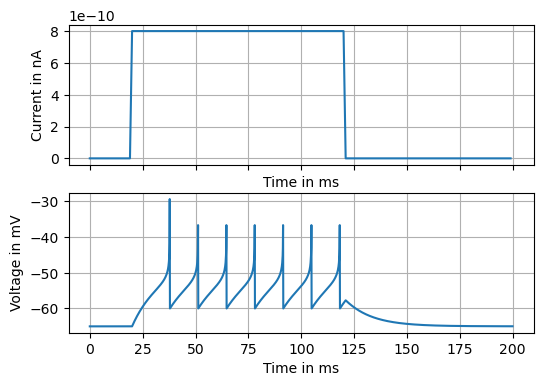

In [69]:
fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(6, 4), sharex=True)

for i in range(n):
    ax[1].plot(statemon.t/ms, statemon.u[i]/mV, label=f"Voltage for current = 0.8")

ax[0].plot(t_rec.values, I_rec.values)
ax[0].set_xlabel("Time in ms")
ax[0].set_ylabel("Current in nA")


ax[1].set_xlabel("Time in ms")
ax[1].set_ylabel("Voltage in mV")
# ax.legend(loc = 'lower right')
ax[1].grid()
ax[0].grid()
plt.show()

In [64]:
spikemon.count[0]

7

# 2.1 

## The mininal current is such that at rheobase voltage, $du/dt = 0$ -> $I_{minimal} = -(\Delta_{T} + u_{rest} - u_{rh})/R$

In [74]:
I_minimal = -(delta_T + u_rest -u_rh)/R 
I_minimal

0.4 * namp

## I_minimal seems to be 0.4*nA

In [108]:
start_scope()

tau = 12.0 * ms
R = 20.0 * Mohm
u_rest = -65.0 * mV
u_reset = -60.0 * mV
u_rh = -55.0 * mV
delta_T = 2.0 * mV
u_fire = 10. * mV

duration = 300*ms
t_rec, I_rec = get_step_current(0, 300, int(duration/ms), ms, 0.405*namp)

n = 1
eqs = ''' 
    du/dt = -(u-u_rest)/tau + delta_T*exp( (u-u_rh)/delta_T )/tau + R*I/tau : volt
    I = I_rec(t) : amp
'''

group = NeuronGroup(n, eqs, threshold=f'u > u_fire', reset=f'u = u_reset', method=exponential_euler)
statemon = StateMonitor(group, 'u', record=True)
group.u = u_rest 

spikemon = SpikeMonitor(group)

run(duration)

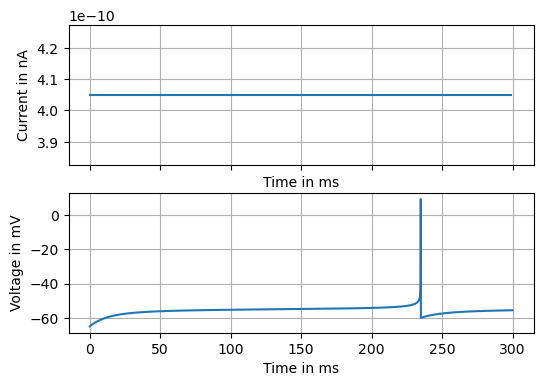

In [109]:
fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(6, 4), sharex=True)

for i in range(n):
    ax[1].plot(statemon.t/ms, statemon.u[i]/mV, label=f"Voltage for current = 0.8")

ax[0].plot(t_rec.values, I_rec.values)
ax[0].set_xlabel("Time in ms")
ax[0].set_ylabel("Current in nA")


ax[1].set_xlabel("Time in ms")
ax[1].set_ylabel("Voltage in mV")
# ax.legend(loc = 'lower right')
ax[1].grid()
ax[0].grid()
plt.show()

In [110]:
spikemon.count[0]

1

# 2.2 

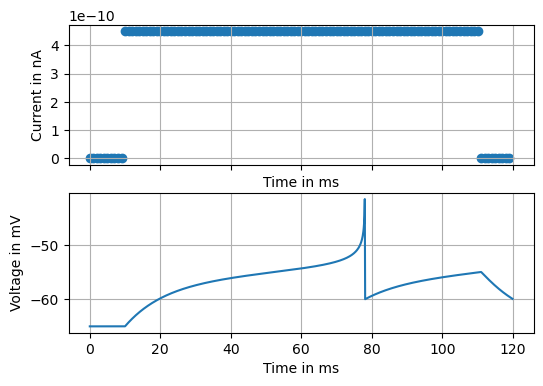

1


In [150]:
start_scope()

tau = 12.0 * ms
R = 20.0 * Mohm
u_rest = -65.0 * mV
u_reset = -60.0 * mV
u_rh = -55.0 * mV
delta_T = 2.0 * mV
u_fire = -30. * mV

i=6
durations = [1,   2,    5,  10,   20,   50, 100]
min_amp =   [5., 4.42, 3., 1.10, .70, .48, 0.45]

t=durations[i]
I_amp = min_amp[i]*namp

duration = (t+20)*ms
t_rec, I_rec = get_step_current(10, 10+t, int(duration/ms), ms, I_amp)

n = 1
eqs = ''' 
    du/dt = -(u-u_rest)/tau + delta_T*exp( (u-u_rh)/delta_T )/tau + R*I/tau : volt
    I = I_rec(t) : amp
'''

group = NeuronGroup(n, eqs, threshold=f'u > u_fire', reset=f'u = u_reset', method=euler)
statemon = StateMonitor(group, 'u', record=True)
group.u = u_rest 

spikemon = SpikeMonitor(group)

run(duration)

fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(6, 4), sharex=True)

for i in range(n):
    ax[1].plot(statemon.t/ms, statemon.u[i]/mV, label=f"Voltage for current = 0.8")

ax[0].scatter(t_rec.values, I_rec.values)
ax[0].set_xlabel("Time in ms")
ax[0].set_ylabel("Current in nA")


ax[1].set_xlabel("Time in ms")
ax[1].set_ylabel("Voltage in mV")
# ax.legend(loc = 'lower right')
ax[1].grid()
ax[0].grid()
plt.show()

print(spikemon.count[0])

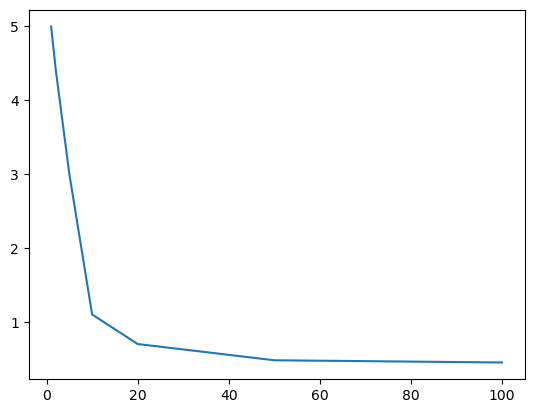

In [151]:
plt.plot(durations, min_amp)